In [1]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


Carichiamo un file csv con i prezzi di Facebook (Meta Platforms)

In [2]:
df = pd.read_csv('FB.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-01,194.779999,196.179993,193.009995,193.029999,193.029999,15996600
1,2019-05-02,193.000000,194.000000,189.750000,192.529999,192.529999,13209500
2,2019-05-03,194.380005,196.160004,193.710007,195.470001,195.470001,14575400
3,2019-05-06,191.240005,194.279999,190.550003,193.880005,193.880005,13994900
4,2019-05-07,192.539993,192.899994,187.850006,189.770004,189.770004,16253000
5,2019-05-08,189.389999,190.720001,188.550003,189.539993,189.539993,12505700
6,2019-05-09,187.199997,189.770004,186.259995,188.649994,188.649994,12967000
7,2019-05-10,188.250000,190.000000,184.589996,188.339996,188.339996,12578500
8,2019-05-13,183.500000,185.429993,180.839996,181.539993,181.539993,16833300
9,2019-05-14,182.520004,183.490005,178.100006,180.729996,180.729996,17628100


In [3]:
df.shape

(22, 7)

Estraiamo dal df l'ultima riga che contiene il valore che vogliamo prevedere

In [4]:
actual_price = df.tail(1)

In [5]:
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
21,2019-05-31,180.279999,180.539993,177.160004,177.470001,177.470001,15226500


In [6]:
df = df.head(len(df)-1)
print(df)

          Date        Open        High         Low       Close   Adj Close  \
0   2019-05-01  194.779999  196.179993  193.009995  193.029999  193.029999   
1   2019-05-02  193.000000  194.000000  189.750000  192.529999  192.529999   
2   2019-05-03  194.380005  196.160004  193.710007  195.470001  195.470001   
3   2019-05-06  191.240005  194.279999  190.550003  193.880005  193.880005   
4   2019-05-07  192.539993  192.899994  187.850006  189.770004  189.770004   
5   2019-05-08  189.389999  190.720001  188.550003  189.539993  189.539993   
6   2019-05-09  187.199997  189.770004  186.259995  188.649994  188.649994   
7   2019-05-10  188.250000  190.000000  184.589996  188.339996  188.339996   
8   2019-05-13  183.500000  185.429993  180.839996  181.539993  181.539993   
9   2019-05-14  182.520004  183.490005  178.100006  180.729996  180.729996   
10  2019-05-15  180.419998  187.279999  180.020004  186.270004  186.270004   
11  2019-05-16  185.050003  188.580002  185.050003  186.990005  

Creiamo due liste vuote dove mettere le variabili indipendente e dipendente

In [7]:
days = list()
adj_close_prices = list()

Estraiamo i dati

In [8]:
df_days = df.loc[:,'Date']
df_adj_close = df.loc[:,'Adj Close']

In [9]:
# Variabile indipendente
for day in df_days:
  days.append([int(day.split('-')[2])])

In [10]:
#Variabile dipendente
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))

Stampiamo i dati

In [11]:
print(adj_close_prices)
print(days)

[193.029999, 192.529999, 195.470001, 193.880005, 189.770004, 189.539993, 188.649994, 188.339996, 181.539993, 180.729996, 186.270004, 186.990005, 185.300003, 182.720001, 184.820007, 185.320007, 180.869995, 181.059998, 184.309998, 182.190002, 183.009995]
[[1], [2], [3], [6], [7], [8], [9], [10], [13], [14], [15], [16], [17], [20], [21], [22], [23], [24], [28], [29], [30]]


Creiamo i 3 Support Vector Regression Models

SVR 1 - Kernel lineare

In [17]:
lin_svr = SVR(kernel='linear', C = 1000.0)
lin_svr.fit(days, adj_close_prices)

SVR(C=1000.0, kernel='linear')

SVR 2 - Kernel polinomiale

In [18]:
poly_svr = SVR(kernel='poly', C = 1000.0, degree = 2)
poly_svr.fit(days, adj_close_prices)

SVR(C=1000.0, degree=2, kernel='poly')

SVR 3 - Kernel RBF (Radial Basis Function)

In [19]:
rbf_svr = SVR(kernel='rbf', C = 1000.0, gamma = 0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, gamma=0.15)

Grafico dei tre modelli per vedere qual è il più conforme ai dati

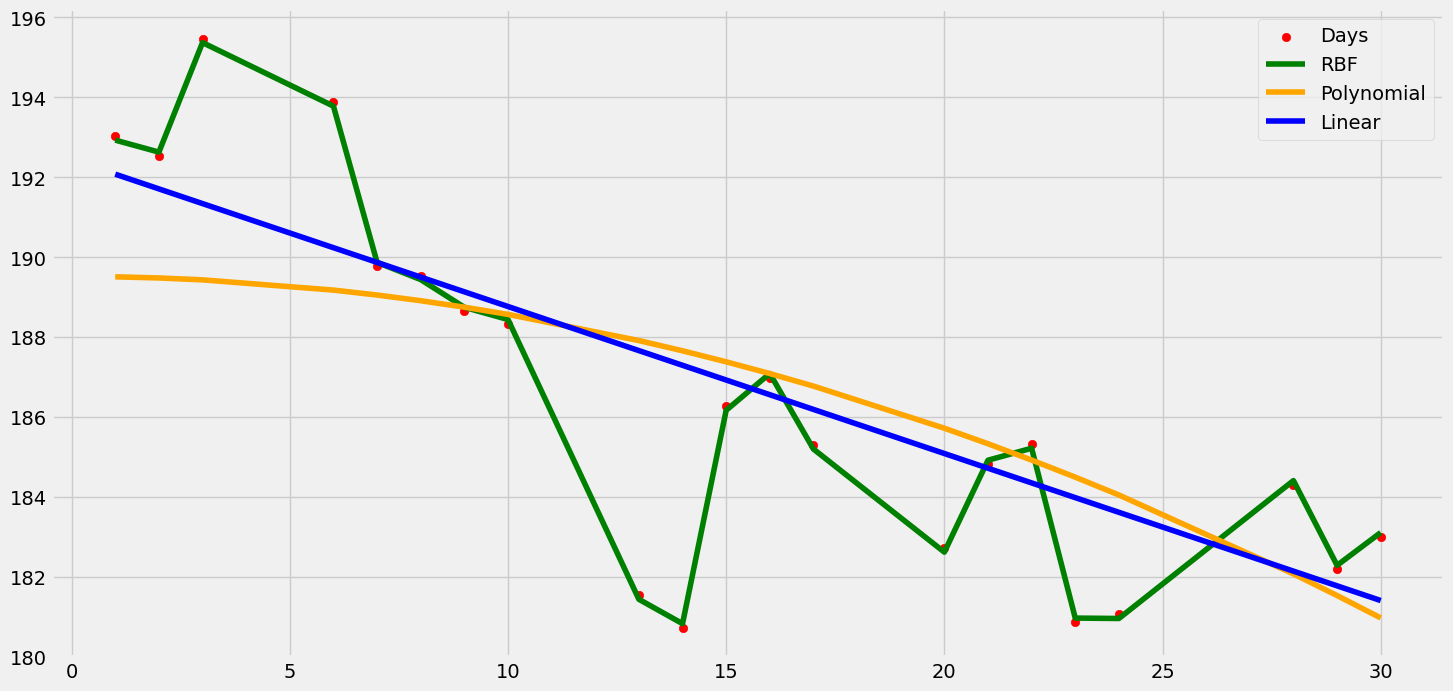

In [20]:
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'red', label = 'Days')
plt.plot(days, rbf_svr.predict(days), color = 'green', label = 'RBF')
plt.plot(days, poly_svr.predict(days), color = 'orange', label = 'Polynomial')
plt.plot(days, lin_svr.predict(days), color = 'blue', label = 'Linear')
plt.grid(True)
plt.legend()
plt.show()

Prezzo previsto per il giorno successivo

In [21]:
day = [[31]]

print('Prezzo previsto con il modello RBF: ', rbf_svr.predict(day))
print('Prezzo previsto con il modello polinomiale: ', poly_svr.predict(day))
print('Prezzo previsto con il modello lineare: ', lin_svr.predict(day))

Prezzo previsto con il modello RBF:  [185.04502179]
Prezzo previsto con il modello polinomiale:  [180.39533267]
Prezzo previsto con il modello lineare:  [181.04143771]


Prezzo del giorno successivo

In [22]:
print('Prezzo effettivo: ', actual_price['Adj Close'][21])

Prezzo effettivo:  177.470001
